<h3>PASO 1 - Importo las librerias</h3>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as sm

<h3>PASO 2 - Cargo el dataframe</h3>

In [2]:
dataframe = pd.read_csv("student_performance.csv", encoding="ISO-8859-1")
dataframe

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
# Creamos una copia para trabajar

dataset = dataframe.copy()
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<h3>PASO 3 - Limpieza de datos</h3>


In [4]:
# Elimino los posibles errores NaN

dataset = dataset.dropna()
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


<h3>PASO 4 - Convierto la columna 'Extracurricular Activities'</h3>

In [5]:
# Pasamos de datos categoricos (yes/no) a datos numericos

original_ea = dataset.pop("Extracurricular Activities")
dataset["Activities Extra"] = (original_ea == "Yes") * 1.0
dataset.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Activities Extra
0,7,99,9,1,91.0,1.0
1,4,82,4,2,65.0,0.0
2,8,51,7,2,45.0,1.0
3,5,52,5,2,36.0,1.0
4,7,75,8,5,66.0,0.0


<h3>PASO 5 - Separo datos de entrada y de salida (Labels)</h3>

In [6]:
data_x = dataset.copy()
data_y = dataset.pop("Performance Index")
data_x.pop("Performance Index")

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [7]:
# Estadisticas generales

estadisticas = data_x.describe()
estadisticas = estadisticas.transpose()
estadisticas

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Activities Extra,10000.0,0.4948,0.499998,0.0,0.0,0.0,1.0,1.0


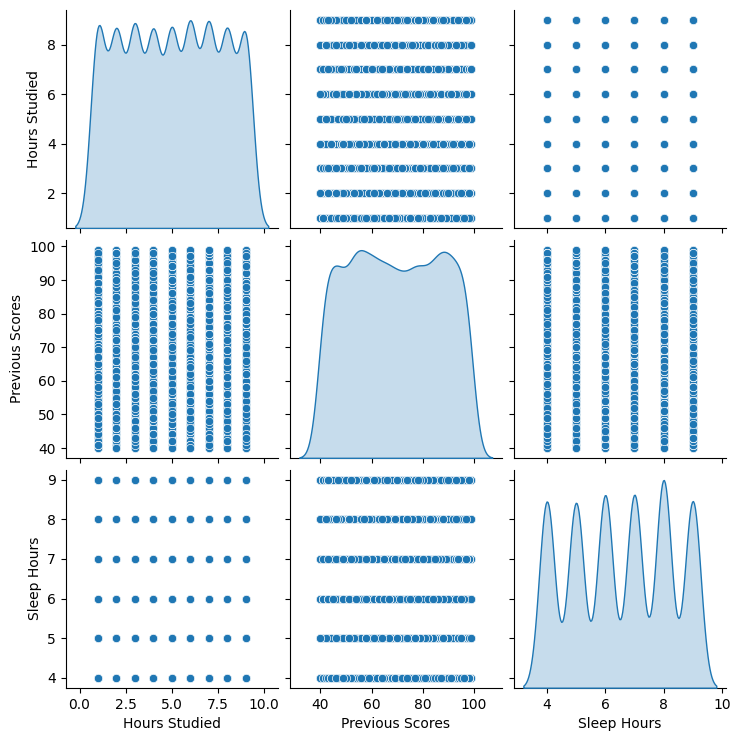

In [8]:
# Grafico los datos puros del dataframe

sns.pairplot(data_x[["Hours Studied", "Previous Scores", "Sleep Hours"]], diag_kind="kde")

<h3>PASO 6 - Normalizado de datos</h3>

In [9]:
# Normalizo los datos con la media y la desviacion estandar

def normalizar(valor):
	return (valor - estadisticas["mean"]) / estadisticas["std"]

normal_x = normalizar(data_x)
normal_x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Activities Extra
0,0.775149,1.704090,1.456132,-1.249691,1.010404
1,-0.383461,0.723876,-1.492220,-0.900937,-0.989604
2,1.161352,-1.063573,0.276791,-0.900937,1.010404
3,0.002742,-1.005913,-0.902549,-0.900937,1.010404
4,0.775149,0.320259,0.866462,0.145326,-0.989604


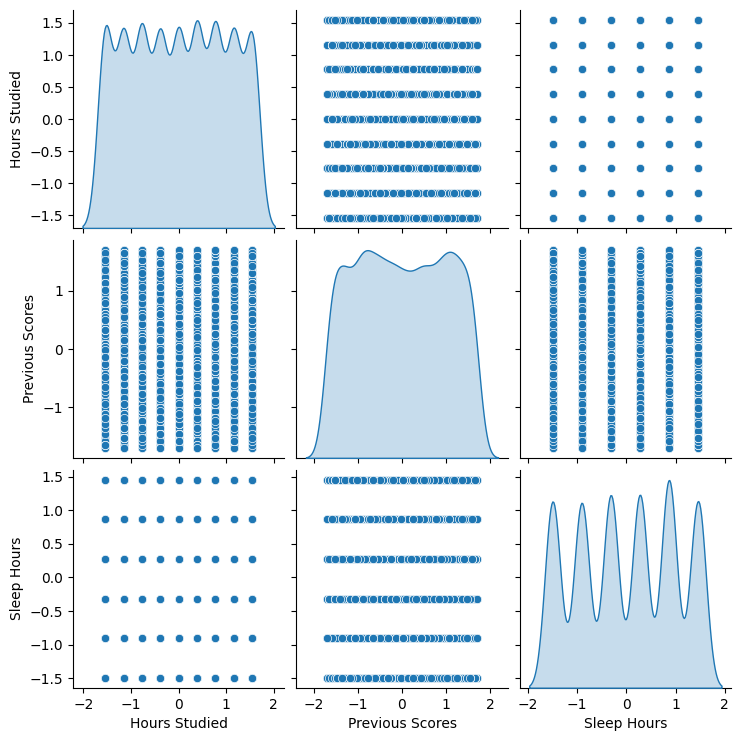

In [10]:
# Grafico los datos normalizados del dataframe

sns.pairplot(normal_x[["Hours Studied", "Previous Scores", "Sleep Hours"]], diag_kind="kde")

<h3>PASO 7 - Divido datos de entrenamiento y de test</h3>

In [11]:
# Decido dividir los datos de entrenamiento y testeo en 80/20 respectivamente

x_entrenar, x_test, y_entrenar, y_test=train_test_split(normal_x, data_y, test_size=0.2)

print("Porcentaje de datos de entrenamiento:", len(x_entrenar)*100/(len(x_entrenar)+len(x_test)))
print("Porcentaje de datos de test_________:", len(x_test)*100/(len(x_entrenar)+len(x_test)))

print(x_entrenar.shape)
print(y_entrenar.shape)

Porcentaje de datos de entrenamiento: 80.0
Porcentaje de datos de test_________: 20.0
(8000, 5)
(8000,)


In [12]:
x_entrenar.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Activities Extra
3739,1.547556,0.550898,0.276791,-0.552183,1.010404
3702,1.547556,-1.524850,0.276791,-0.203428,-0.989604
7954,-0.769665,0.954515,1.456132,-1.598446,1.010404
3997,-1.155868,-1.697829,1.456132,-0.900937,-0.989604
7287,-1.155868,-0.083359,0.276791,-0.203428,1.010404


In [13]:
x_test.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Activities Extra
1566,1.161352,1.415792,0.276791,-0.203428,1.010404
7679,-0.769665,-1.005913,-0.902549,-0.552183,1.010404
3486,-1.155868,0.031961,-0.312879,1.191589,-0.989604
3144,1.161352,-1.409530,-1.492220,0.842835,-0.989604
8763,0.775149,-0.429316,0.866462,1.191589,-0.989604


<h3>PASO 8 - Planteo y evaluo el modelo con la regresion linear</h3>

In [14]:
# Instancio la clase LinearRegression para entrenar el modelo

regresion_lineal = linear_model.LinearRegression()

regresion_lineal.fit(x_entrenar, y_entrenar)
y_prediccion_entrenar = regresion_lineal.predict(x_entrenar)


In [15]:
regresion_lineal.score(x_entrenar, y_entrenar)

0.9887734219067683

In [16]:
# Evaluo la regresion linear con los valores de entrenamiento

print("Error absoluto medio =", round(sm.mean_absolute_error(y_entrenar, y_prediccion_entrenar), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(y_entrenar, y_prediccion_entrenar), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(y_entrenar, y_prediccion_entrenar), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(y_entrenar, y_prediccion_entrenar), 2)) 
print("Puntuación R2 =", round(sm.r2_score(y_entrenar, y_prediccion_entrenar), 2))

Error absoluto medio = 1.61
Error cuadratico medio = 4.12
Error absoluto mediano = 1.35
Puntuación de varianza explicada = 0.99
Puntuación R2 = 0.99


In [17]:
# Uso la instancia regresion_lineal para testear el modelo

y_prediccion_test = regresion_lineal.predict(x_test)

In [18]:
regresion_lineal.score(x_test, y_test)

0.9886506048868039

In [19]:
# Evaluo la regresion linear con los valores de testeo

print("Error absoluto medio =", round(sm.mean_absolute_error(y_test, y_prediccion_test), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(y_test, y_prediccion_test), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(y_test, y_prediccion_test), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(y_test, y_prediccion_test), 2)) 
print("Puntuación R2 =", round(sm.r2_score(y_test, y_prediccion_test), 2))

Error absoluto medio = 1.65
Error cuadratico medio = 4.28
Error absoluto mediano = 1.39
Puntuación de varianza explicada = 0.99
Puntuación R2 = 0.99


<h3>PASO 9 - Grafico la relacion entre la prediccion y el valor real</h3>

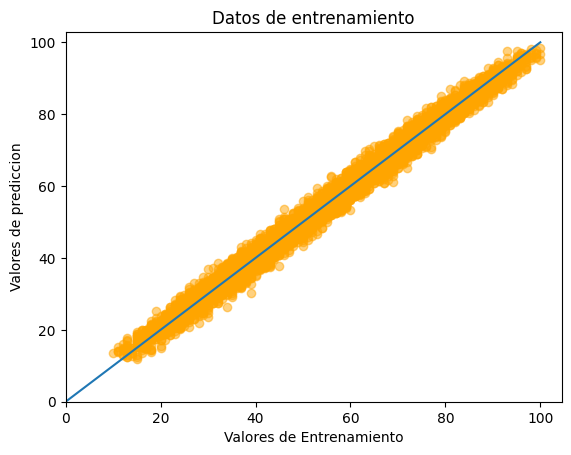

In [20]:
# Grafico los valores de resultado reales de entrenamiento con los de prediccion de entrenamiento

plt.figure()
plt.scatter(y_entrenar, y_prediccion_entrenar, color="orange", alpha=0.5)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.title("Datos de entrenamiento")
plt.xlabel("Valores de Entrenamiento")
plt.ylabel("Valores de prediccion")
plt.show()

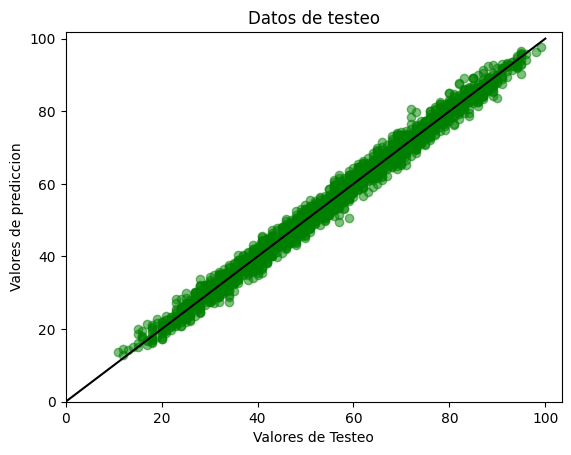

In [21]:
# Grafico los valores de resultado reales de testeo con los de prediccion de testeo

plt.figure()
plt.scatter(y_test, y_prediccion_test, color="green", alpha=0.5)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], color="black")
plt.title("Datos de testeo")
plt.xlabel("Valores de Testeo")
plt.ylabel("Valores de prediccion")
plt.show()

<h3>PASO 10 - Grafico la distribucion de errores</h3>

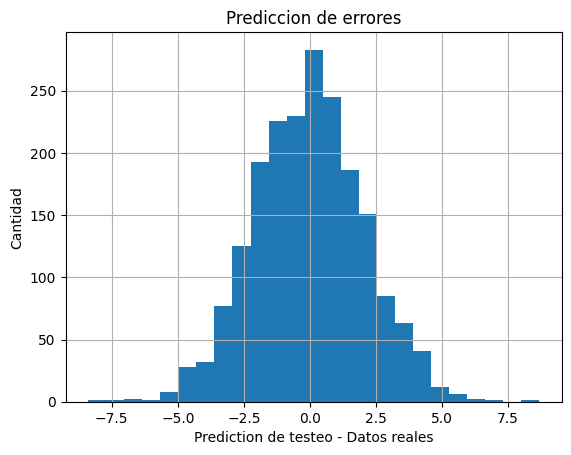

In [22]:
# Grafico las predicciones de error

error = y_prediccion_test - y_test
plt.hist(error, bins = 25)
plt.title("Prediccion de errores")
plt.xlabel("Prediction de testeo - Datos reales")
plt.ylabel("Cantidad")
plt.grid()
plt.show()

<h3>PASO 11 - Conclusiones</h3>

<p>Se puede ver que en la relacion entre los de resultado para el testeo y los predichos por el modelo no se dispersan demasiado con respecto a la linea optima de correlacion.</p>
<p>Considero tambien que la cantidad de muestras que componen al dataset es buena, ya que el histograma de prediccion de errores da una forma casi Gaussiana.</p>
